# Certification Project

## No entry without mask

## Problem Statement
India has been fighting the COVID-19 pandemic since30 January 2020 when the first case of COVID-19 wasreported. With the Unlock 4.0 phase set to begin inSeptember, the need to be proactive is now more thanever. The objective is to create a Real-Time Face MaskDetector which can solve monitoring issues in crowdedareas  such  as  Airports,  Metros,  etc.  using  CNN  and OpenCV.
Dataset DescriptionThe dataset is an artificial set of face mask images
* Total Images: 1376 with_mask images and without_mask images.

The goal is to create a Deep Learning model to detect in real-time whether a person is wearing a face mask or notAim of the Project


In [1]:
!nvidia-smi

Wed Nov  3 06:24:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Import Required Libraries

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img

### Load and Pre-process the dataset

In [3]:
dataset='/content/drive/MyDrive/dataset'

In [4]:
train_datagen=ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    rescale=1/255.)

In [5]:
train_folder=train_datagen.flow_from_directory(dataset,class_mode='binary',target_size=(224,224),subset='training')
val_folder=train_datagen.flow_from_directory(dataset,class_mode='binary',target_size=(224,224),subset='validation')

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


### Visualize the dataset

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


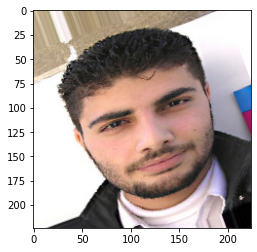

In [11]:
plt.imshow(val_folder[0][0][0])

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


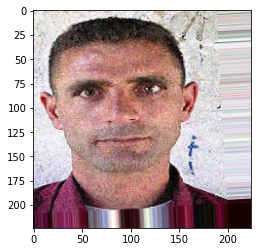

In [10]:
plt.imshow(train_folder[0][0][0])

### Design a Convolutional Neural Network (CNN) Model

In [12]:
model =Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                       input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


### Compile the Model

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

### Train the Model

In [13]:
history = model.fit(train_folder,epochs=20,validation_data=val_folder)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
35/35 [==============================] - 637s 17s/step - loss: 0.6527 - accuracy: 0.5840 - val_loss: 0.4259 - val_accuracy: 0.8618
Epoch 2/20
35/35 [==============================] - 23s 672ms/step - loss: 0.3058 - accuracy: 0.8765 - val_loss: 0.2946 - val_accuracy: 0.9018
Epoch 3/20
35/35 [==============================] - 23s 669ms/step - loss: 0.1932 - accuracy: 0.9255 - val_loss: 0.1381 - val_accuracy: 0.9491
Epoch 4/20
35/35 [==============================] - 23s 671ms/step - loss: 0.1247 - accuracy: 0.9619 - val_loss: 0.0847 - val_accuracy: 0.9709
Epoch 5/20
35/35 [==============================] - 23s 666ms/step - loss: 0.1384 - accuracy: 0.9555 - val_loss: 0.1141 - val_accuracy: 0.9673
Epoch 6/20
35/35 [==============================] - 23s 669ms/step - loss: 0.0894 - accuracy: 0.9728 - val_loss: 0.1478 - val_accuracy: 0.9382
Epoch 7/20
35/35 [==============================] - 23s 669ms/step - loss: 0.1742 - accuracy: 0.9519 - val_loss: 0.0725 - val_accuracy: 0.9709


### Plotting accuracy and loss curves after training

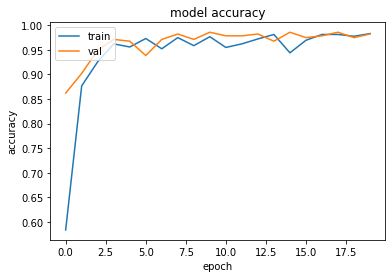

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

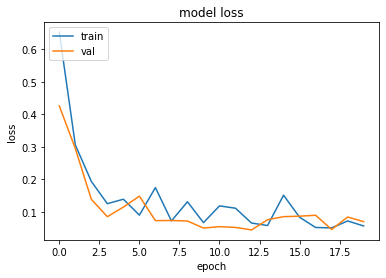

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Evaluate the model

In [17]:
model.evaluate(val_folder,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


9/9 [==============================] - 4s 481ms/step - loss: 0.0334 - accuracy: 0.9891


[0.033448271453380585, 0.9890909194946289]

In [18]:
val_folder.class_indices

{'with_mask': 0, 'without_mask': 1}

In [42]:
img_path='/content/drive/MyDrive/dataset/with_mask/1-with-mask.jpg'
img = cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img= cv2.resize(img, (224, 224))
img=np.expand_dims(img,axis=0)
img=img/255
print(img.shape)
res=model.predict(img)

(1, 224, 224, 3)


In [47]:
res[0]>=0.5

array([False])

## Detect the Face Masks using the HaarCascade_frontalface_default.xml file in real time

Since we cant use webcam in colab i tried with the images and displayed them


In [20]:
def get_mask_or_nomask(pred):
  if pred < 0.5:
    return 0
  else:
    return 1

### Detection with mask

Index 0


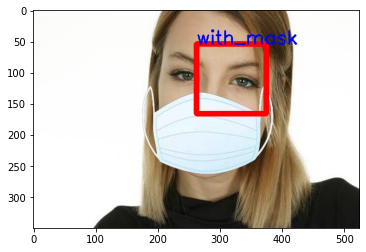

In [49]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image


face_haar_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')

img_path='/content/drive/MyDrive/dataset/with_mask/1-with-mask.jpg'
img = cv2.imread(img_path)
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#window for each face detected in the frame

faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


for (x,y,w,h) in faces_detected:
    
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
    
    roi=img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
    
    roi=cv2.resize(roi,(224,224))
    
    img_pixels = image.img_to_array(roi)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels /= 255

    predictions = model.predict(img_pixels)

    #find max indexed array
    max_index = get_mask_or_nomask(predictions[0])
    print("Index",max_index)

    emotions = ('with_mask', 'without_mask')
    predicted_emotion = emotions[max_index]

    cv2.putText(img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(img)

### Detection without mask

Index 1


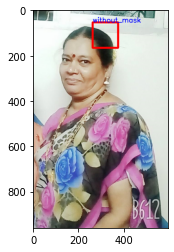

In [63]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image


face_haar_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')

img_path='/content/drive/MyDrive/dataset/without_mask/110.jpg'
img = cv2.imread(img_path)
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#window for each face detected in the frame

faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


for (x,y,w,h) in faces_detected:
    
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
    
    roi=img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
    
    roi=cv2.resize(roi,(224,224))
    
    img_pixels = image.img_to_array(roi)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels /= 255

    predictions = model.predict(img_pixels)

    #find max indexed array
    max_index = get_mask_or_nomask(predictions[0])
    print("Index",max_index)

    emotions = ('with_mask', 'without_mask')
    predicted_emotion = emotions[max_index]

    cv2.putText(img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(img)

Code for the real time video

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image


face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    
    if not ret:
        break
    test_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    
    #window for each face detected in the frame
    
    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        
        roi_gray=cv2.resize(roi_gray,(48,48))
        
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = get_mask_or_nomask(predictions[0])

        arr = ('with_mask', 'without_mask')
        predicted_res = arr[max_index]

        cv2.putText(test_img, predicted_res, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Mask Detection ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows